In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


%matplotlib inline

In [18]:
st_el_meta = pd.read_csv("2015_16_Statewise_Elementary_Metadata.csv", header=1)
st_el = pd.read_csv("2015_16_Statewise_Elementary.csv")

In [65]:
st_el_cols = st_el_meta['AC_YEAR']
#st_el_cols

In [91]:
import re
def sumcols_pat(pattern):
    return st_el[[col for col in st_el.columns if re.match(pattern, col)]].transpose().sum()

In [204]:
pd.options.mode.chained_assignment = None
norm_st_el = pd.DataFrame()

#norm_st_el["SCHTOT"] = st_el["SCHTOT"]
#norm_st_el["ENRTOT"] = st_el["ENRTOT"]
norm_st_el["STATCD"] = st_el["STATCD"]
norm_st_el["POP_DEN"] = st_el["TOTPOPULAT"]*1000 / st_el["AREA_SQKM"]
norm_st_el["ENR"] = (st_el["ENRTOT"] / ((st_el["TOT_6_10_15"] + st_el["TOT_11_13_15"])))
norm_st_el["L50_ENR"] = st_el["ENR50TOT"] / st_el["SCHTOT"]

# result is not immediate. need subsequent year's data
#norm_st_el["SDG"] = st_el["CONTIE"] / st_el["CONTIR"]
#norm_st_el["TLMG"] = st_el["TLME"] / st_el["TLMR"]

# something related to infrastructure
norm_st_el["ESTD"] = st_el["ESTDTOT"] / st_el["SCHTOT"]
#norm_st_el["GIR_TOILET"] = st_el["SGTOILTOT"] / st_el["SCHTOT"]
#norm_st_el["BOY_TOILET"] = st_el["SBTOILTOT"] / st_el["SCHTOT"]
#norm_st_el["BNDRY"] = st_el["SBNDRTOT"] / st_el["SCHTOT"]
#norm_st_el["PLAY"] = st_el["SPLAYTOT"] / st_el["SCHTOT"]
#norm_st_el["DRINK_WATER"] = st_el["SWATTOT"] / st_el["SCHTOT"]
#norm_st_el["ELECTRIC"] = st_el["SELETOT"] / st_el["SCHTOT"]
#norm_st_el["ROAD"] = st_el["ROADTOT"] / st_el["SCHTOT"]
#norm_st_el["KIT"] = st_el["KITTOT"] / st_el["SCHTOT"]
#norm_st_el["COMP"] = st_el["SCOMPTOT"] / st_el["SCHTOT"]
norm_st_el["CLS"] = st_el["CLSTOT"] / st_el["SCHTOT"]

# might not affect on an average. needed for special needs analysis
norm_st_el["RAMP"] = st_el["SRAMTOT"] / st_el["SCHTOT"]

# resources
norm_st_el["TEA"] = st_el["TCHTOT"] / st_el["SCHTOT"]
norm_st_el["STR"] = st_el["ENRTOT"] / st_el["STCHTOT"]
norm_st_el["CLR_TEA"] = st_el["CLSTOT"] / st_el["TCHTOT"]
norm_st_el["SMC"] = st_el["SMCTOT"] / st_el["SCHTOT"]

# other incentives
norm_st_el["MDM"] = st_el["MDMTOT"] / st_el["SCHTOT"]
#norm_st_el["MDM_OP"] = st_el["KITSTOT"] / st_el["MDMTOT"]

# correlated dups
#norm_st_el["SIN_CLS"] =  st_el["SCLSTOT"] / st_el["SCHTOT"]
#norm_st_el["SIN_TEA"] =  st_el["STCHTOT"] / st_el["SCHTOT"]
#norm_st_el["GOOD_CLS"] = sumcols_pat("^TOTCLGD[0-9]G$") / st_el["SCHTOT"]
#norm_st_el["MIN_CLS"] = sumcols_pat("^TOTCLMI[0-9]G$") / st_el["SCHTOT"]
#norm_st_el["MAJ_CLS"] = sumcols_pat("^TOTCLMJ[0-9]G$") / st_el["SCHTOT"]
#norm_st_el["OTH_RMS"] = sumcols_pat("^TOTCLOT[0-9]G$") / st_el["SCHTOT"]

norm_st_el.head()

,STATCD,POP_DEN,ENR,L50_ENR,ESTD,CLS,RAMP,TEA,STR,CLR_TEA,SMC,MDM
0,1,56.466999,0.800908,0.614459,0.462349,4.860697,0.131080,5.523375,1064.055014,0.880023,0.807544,0.811848
1,2,123.165628,1.008896,0.711829,0.201842,4.047770,0.563526,5.263260,644.150407,0.769061,0.851531,0.850588
2,3,550.097296,1.004388,0.298791,0.201592,6.185293,0.166493,8.704128,2503.120025,0.710616,0.699368,0.691583
3,4,9254.385965,0.866774,0.004975,0.184080,20.169154,0.467662,46.313433,inf,0.435493,0.597015,0.577114
4,5,189.162912,0.945801,0.635461,0.249873,3.993576,0.185461,4.622739,1099.276637,0.863898,0.752156,0.749662


In [201]:
corr = norm_st_el.corr()
corr.head()

,POP_DEN,ENR,L50_ENR,ESTD,CLS,RAMP,TEA,STR,CLR_TEA,SMC,MDM
POP_DEN,1.000000,-0.038790,-0.524120,-0.163919,0.634392,0.436804,0.616539,0.652922,-0.310438,-0.622331,-0.355823
ENR,-0.038790,1.000000,0.379091,0.228307,-0.229652,-0.173887,-0.230850,0.202227,0.103680,0.021640,0.012136
L50_ENR,-0.524120,0.379091,1.000000,0.157025,-0.666392,-0.359330,-0.571924,-0.418377,0.148525,0.333548,0.351057
ESTD,-0.163919,0.228307,0.157025,1.000000,-0.290127,-0.326324,-0.331901,-0.070137,0.568583,0.204822,0.181132
CLS,0.634392,-0.229652,-0.666392,-0.290127,1.000000,0.374457,0.964090,0.734308,-0.492719,-0.458321,-0.583521


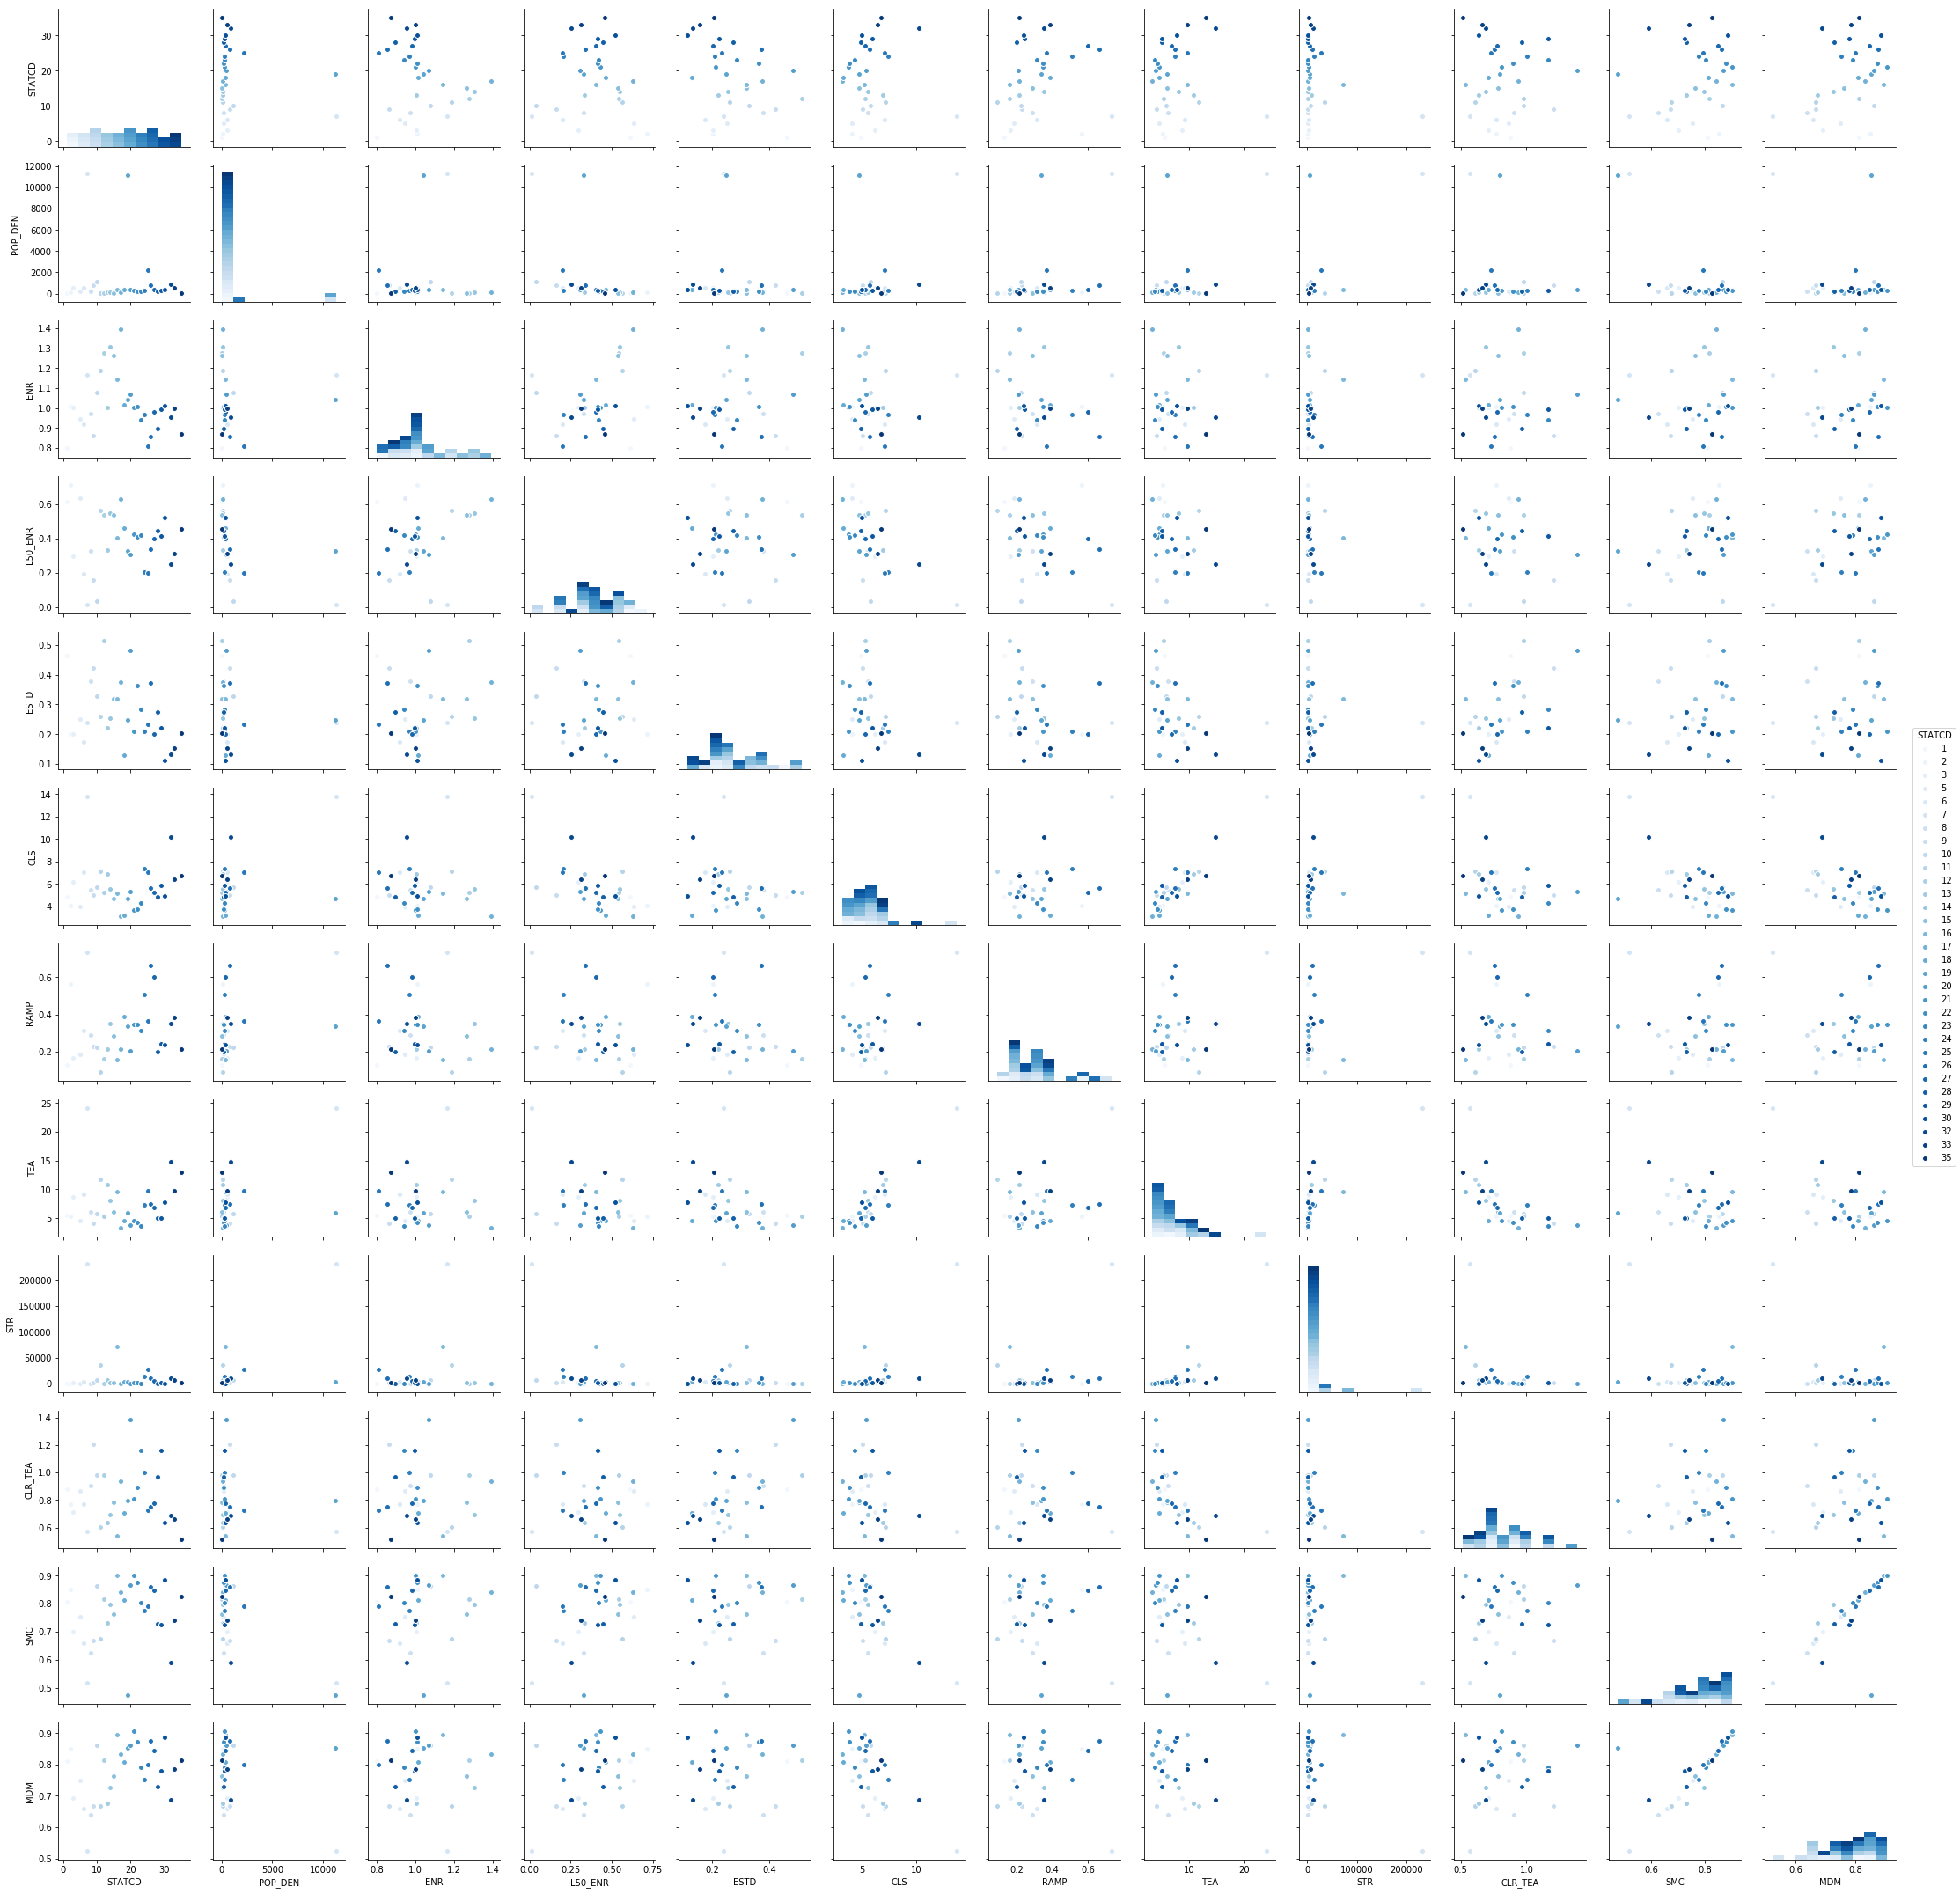

In [226]:
no_nan = norm_st_el.replace([np.inf, -np.inf], np.nan).dropna()
sns.pairplot(no_nan, hue='STATCD', palette="Blues")

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [209]:
scaler.fit(no_nan)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [211]:
scaled = scaler.transform(no_nan)
scaled.shape
df_scaled = pd.DataFrame(scaled, columns=norm_st_el.columns)
df_scaled.shape

(32, 12)

In [212]:
from sklearn.decomposition import PCA

In [213]:
pca = PCA(n_components=10)
pca.fit(scaled)
x_pca = pca.transform(scaled)
x_pca.shape

(32, 10)

In [217]:
df_comp = pd.DataFrame(pca.components_, columns=no_nan.columns)
df_comp

,STATCD,POP_DEN,ENR,L50_ENR,ESTD,CLS,RAMP,TEA,STR,CLR_TEA,SMC,MDM
0,-0.031197,0.324448,-0.001245,-0.277273,-0.163063,0.420959,0.213404,0.418648,0.376696,-0.209835,-0.324873,-0.317495
1,-0.534834,0.110152,0.237959,-0.033352,0.518909,-0.006522,-0.275658,-0.117674,0.089767,0.355968,-0.245582,-0.299762
2,0.231575,0.068864,-0.570866,-0.501370,0.102030,0.054277,0.144571,-0.175709,-0.154115,0.507137,-0.135098,-0.007029
3,0.097255,0.338550,0.329346,-0.097704,0.332455,-0.042899,0.468525,-0.045284,0.341641,0.163462,0.305689,0.432543
4,-0.236322,0.515103,-0.088986,0.256555,-0.300415,-0.358651,0.287225,-0.294739,-0.166940,-0.056116,-0.423333,0.081270
5,-0.621656,-0.239186,-0.489639,0.030441,0.074780,-0.024864,0.373685,0.029027,0.147049,-0.179784,0.336648,-0.041114
6,-0.039631,0.386134,-0.382400,-0.083945,0.244851,-0.063453,-0.553121,0.131978,0.121060,-0.340835,0.012675,0.421579
7,-0.337302,-0.005865,0.304826,-0.693481,-0.430100,-0.135477,-0.163495,-0.146487,-0.082305,-0.067121,0.175506,0.136924
8,0.028111,-0.095320,0.140825,-0.257265,0.470730,0.020378,0.280169,0.041802,-0.563940,-0.486462,-0.215699,0.025766
9,-0.293742,0.071141,0.043242,0.190247,-0.143176,0.598398,-0.001195,0.231265,-0.410322,0.286856,-0.003447,0.433433


In [218]:
norm_st_el.describe()

,STATCD,POP_DEN,ENR,L50_ENR,ESTD,CLS,RAMP,TEA,STR,CLR_TEA,SMC,MDM
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000
mean,18.000000,1380.511319,1.007245,0.365478,0.267650,6.347379,0.323413,9.339484,inf,0.796633,0.762346,0.771730
std,10.246951,2931.732402,0.147598,0.182168,0.101132,3.215702,0.153207,8.069640,NaN,0.220066,0.117092,0.101512
min,1.000000,16.514813,0.774801,0.004975,0.111491,3.123823,0.090696,3.325149,2.977452e+02,0.435493,0.474233,0.524604
25%,9.500000,160.534121,0.906632,0.233567,0.201717,4.764965,0.212028,5.031648,1.081666e+03,0.649616,0.687057,0.689697
50%,18.000000,350.085829,0.999374,0.401301,0.243902,5.500329,0.311972,6.784621,2.784056e+03,0.769061,0.791667,0.791622
75%,26.500000,794.458282,1.056198,0.491557,0.324085,6.982485,0.376281,9.692989,1.039594e+04,0.922151,0.849050,0.851252
max,35.000000,11296.695887,1.393884,0.711829,0.512961,20.169154,0.733438,46.313433,inf,1.384481,1.000000,0.951220


In [219]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [220]:
kmeans.fit(df_scaled[["STATCD","ENR"]])
df_scaled[["STATCD","ENR"]]

,STATCD,ENR
0,-1.724097,-1.580169
1,-1.619804,-0.104415
2,-1.515510,-0.136399
3,-1.306924,-0.552099
4,-1.202631,-0.751264
5,-1.098338,1.010868
6,-0.994044,-0.363124
7,-0.889751,-1.150015
8,-0.785458,0.381652
9,-0.681165,1.164676


In [221]:
kmeans.cluster_centers_

array([[ 1.12974416, -0.62972837],
       [-0.50734293,  1.72072547],
       [-1.3218231 , -0.66249787],
       [-0.01629581,  0.15501803]])

In [222]:
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

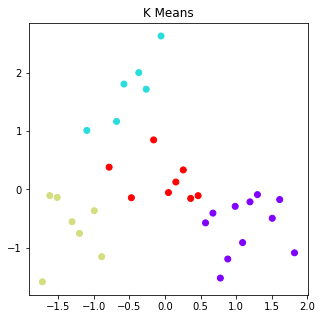

In [227]:
f, ax1 = plt.subplots(1, 1, sharey=True,figsize=(5,5))
ax1.set_title('K Means')
ax1.scatter(df_scaled['STATCD'],df_scaled['ENR'],c=kmeans.labels_,cmap='rainbow')

In [228]:
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])